In [75]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable
from numpy.typing import NDArray

np.random.seed(1234)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

## Utility functions

In [76]:
def append_ones(matrix, axis=1):
    ones = np.ones((matrix.shape[0], 1), dtype=matrix.dtype)
    return np.concatenate((matrix, ones), axis=axis)

## Feed-forward, activations and tiles

In [77]:
def feed_forward(W: NDArray, X: NDArray, f: Callable[[NDArray], NDArray]) -> NDArray:
    return f(X @ W)

In [78]:
def sigmoid(x: NDArray) -> NDArray:
    return 1 / (1 + np.exp(-x))

In [79]:
def tiles(examples: NDArray):
    """
    Arrange 2D matrices as tiles and plot it.

    Args:
        examples (NDArray): 4-D tensor with shape `(nrow, ncol, tile_height, tile_width)`
    """
    space = 2
    nrow, ncol, H, W = examples.shape

    shape = (nrow * (H + space) - space, ncol * (H + space) - space)
    img = np.empty(shape)
    img.fill(np.nan)

    for r in range(nrow):
        for c in range(ncol):
            x0 = r * (H + space)
            y0 = c * (W + space)

            # NOTE: We scale each tile separately to the [0;1] range.
            m = np.min(examples[r, c, ...])
            M = np.max(examples[r, c, ...])
            img[x0 : x0 + H, y0 : y0 + W] = (examples[r, c, ...] - m) / (M - m)

    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()

## Histogram of activations and filters plot

In [80]:
class Rbm:
    def __init__(self, visible_size: int, hidden_size: int, learning_rate: float):
        self.visible_size = visible_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.W = np.random.normal(scale=0.01, size=(visible_size + 1, hidden_size + 1)).astype(np.float32)
        self.W[:, -1] = 0.0
        self.W[-1, :] = 0.0

In [81]:
import pickle
import seaborn as sns

from mnists import MNIST

with open("./lab1_rbm.pickle.dat", "rb") as file:
    rbm: Rbm = pickle.load(file)

DATASET_SIZE = 512
DIGIT_SIZE = 28

mnist = MNIST()
mnist_dataset = mnist.test_images().astype(np.float32)

np.random.shuffle(mnist_dataset)

mnist_dataset = mnist_dataset[:DATASET_SIZE] / 255.0
mnist_dataset = mnist_dataset.reshape(DATASET_SIZE, DIGIT_SIZE * DIGIT_SIZE)
mnist_dataset = append_ones(mnist_dataset)

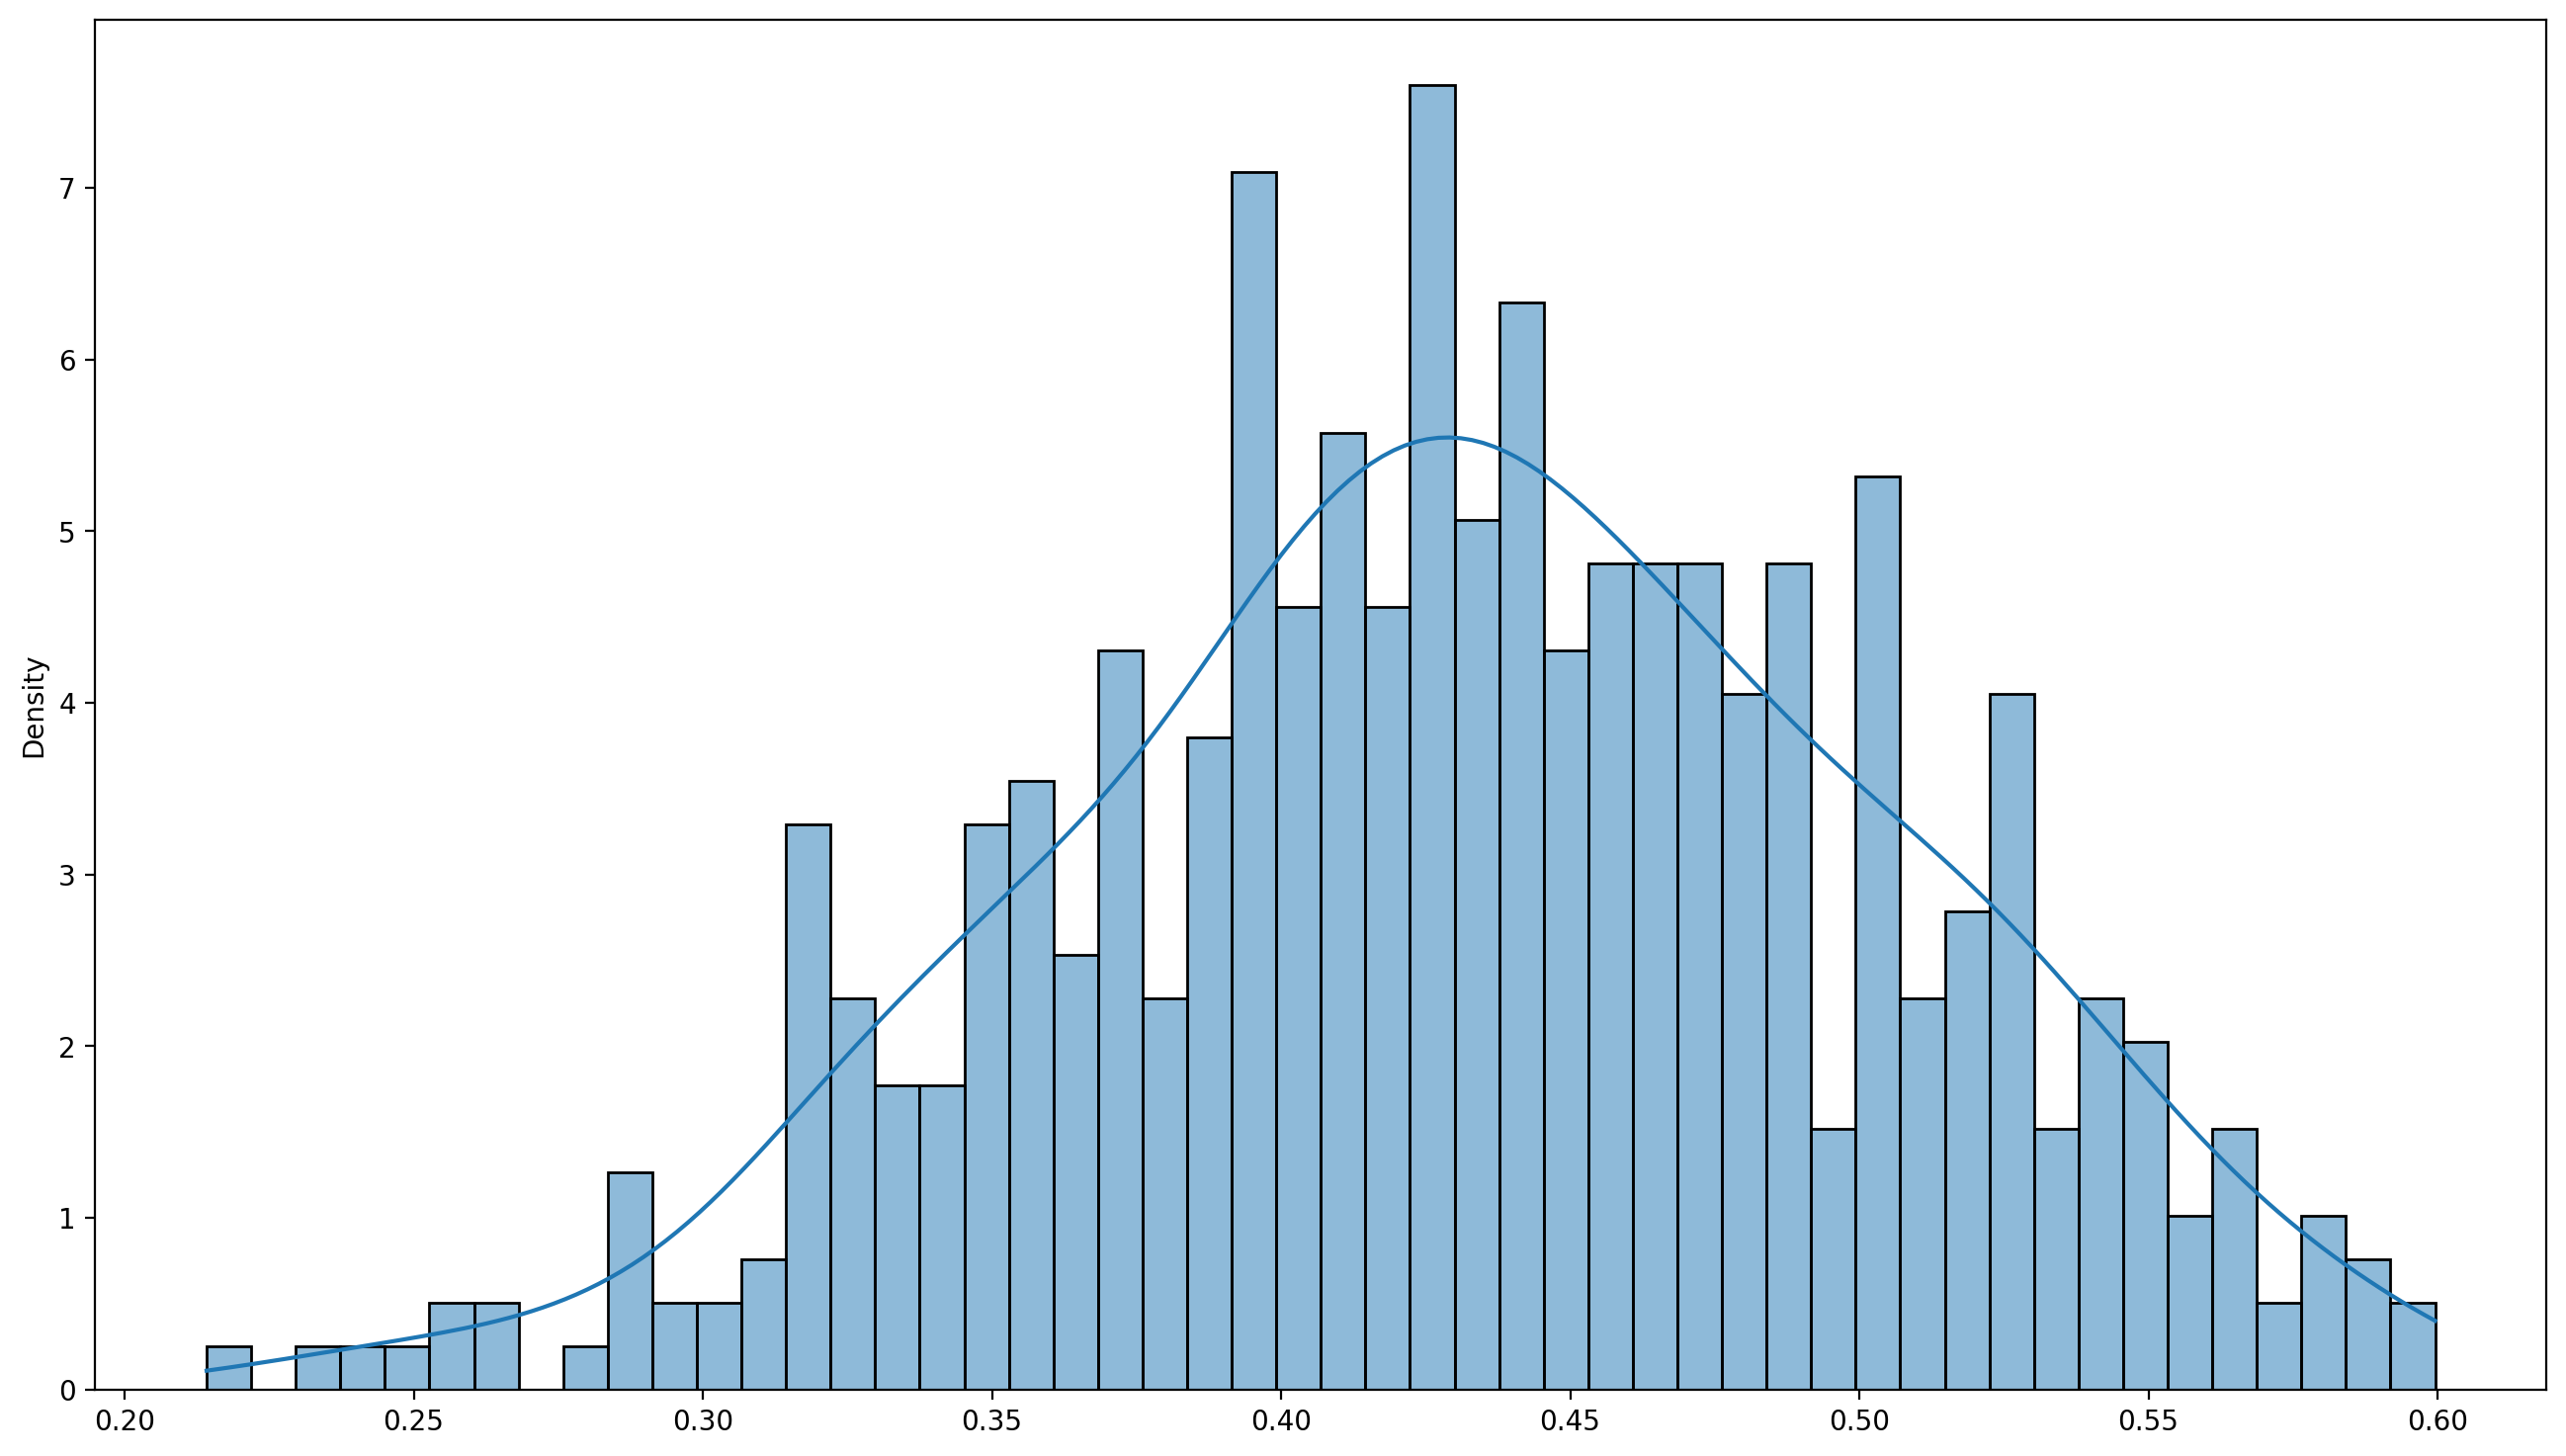

In [84]:
# Plotting mean hidden activations
activations = feed_forward(rbm.W, mnist_dataset, sigmoid)
mean_activations = np.mean(activations, 1)

sns.histplot(mean_activations, bins=50, kde=True, stat="density");

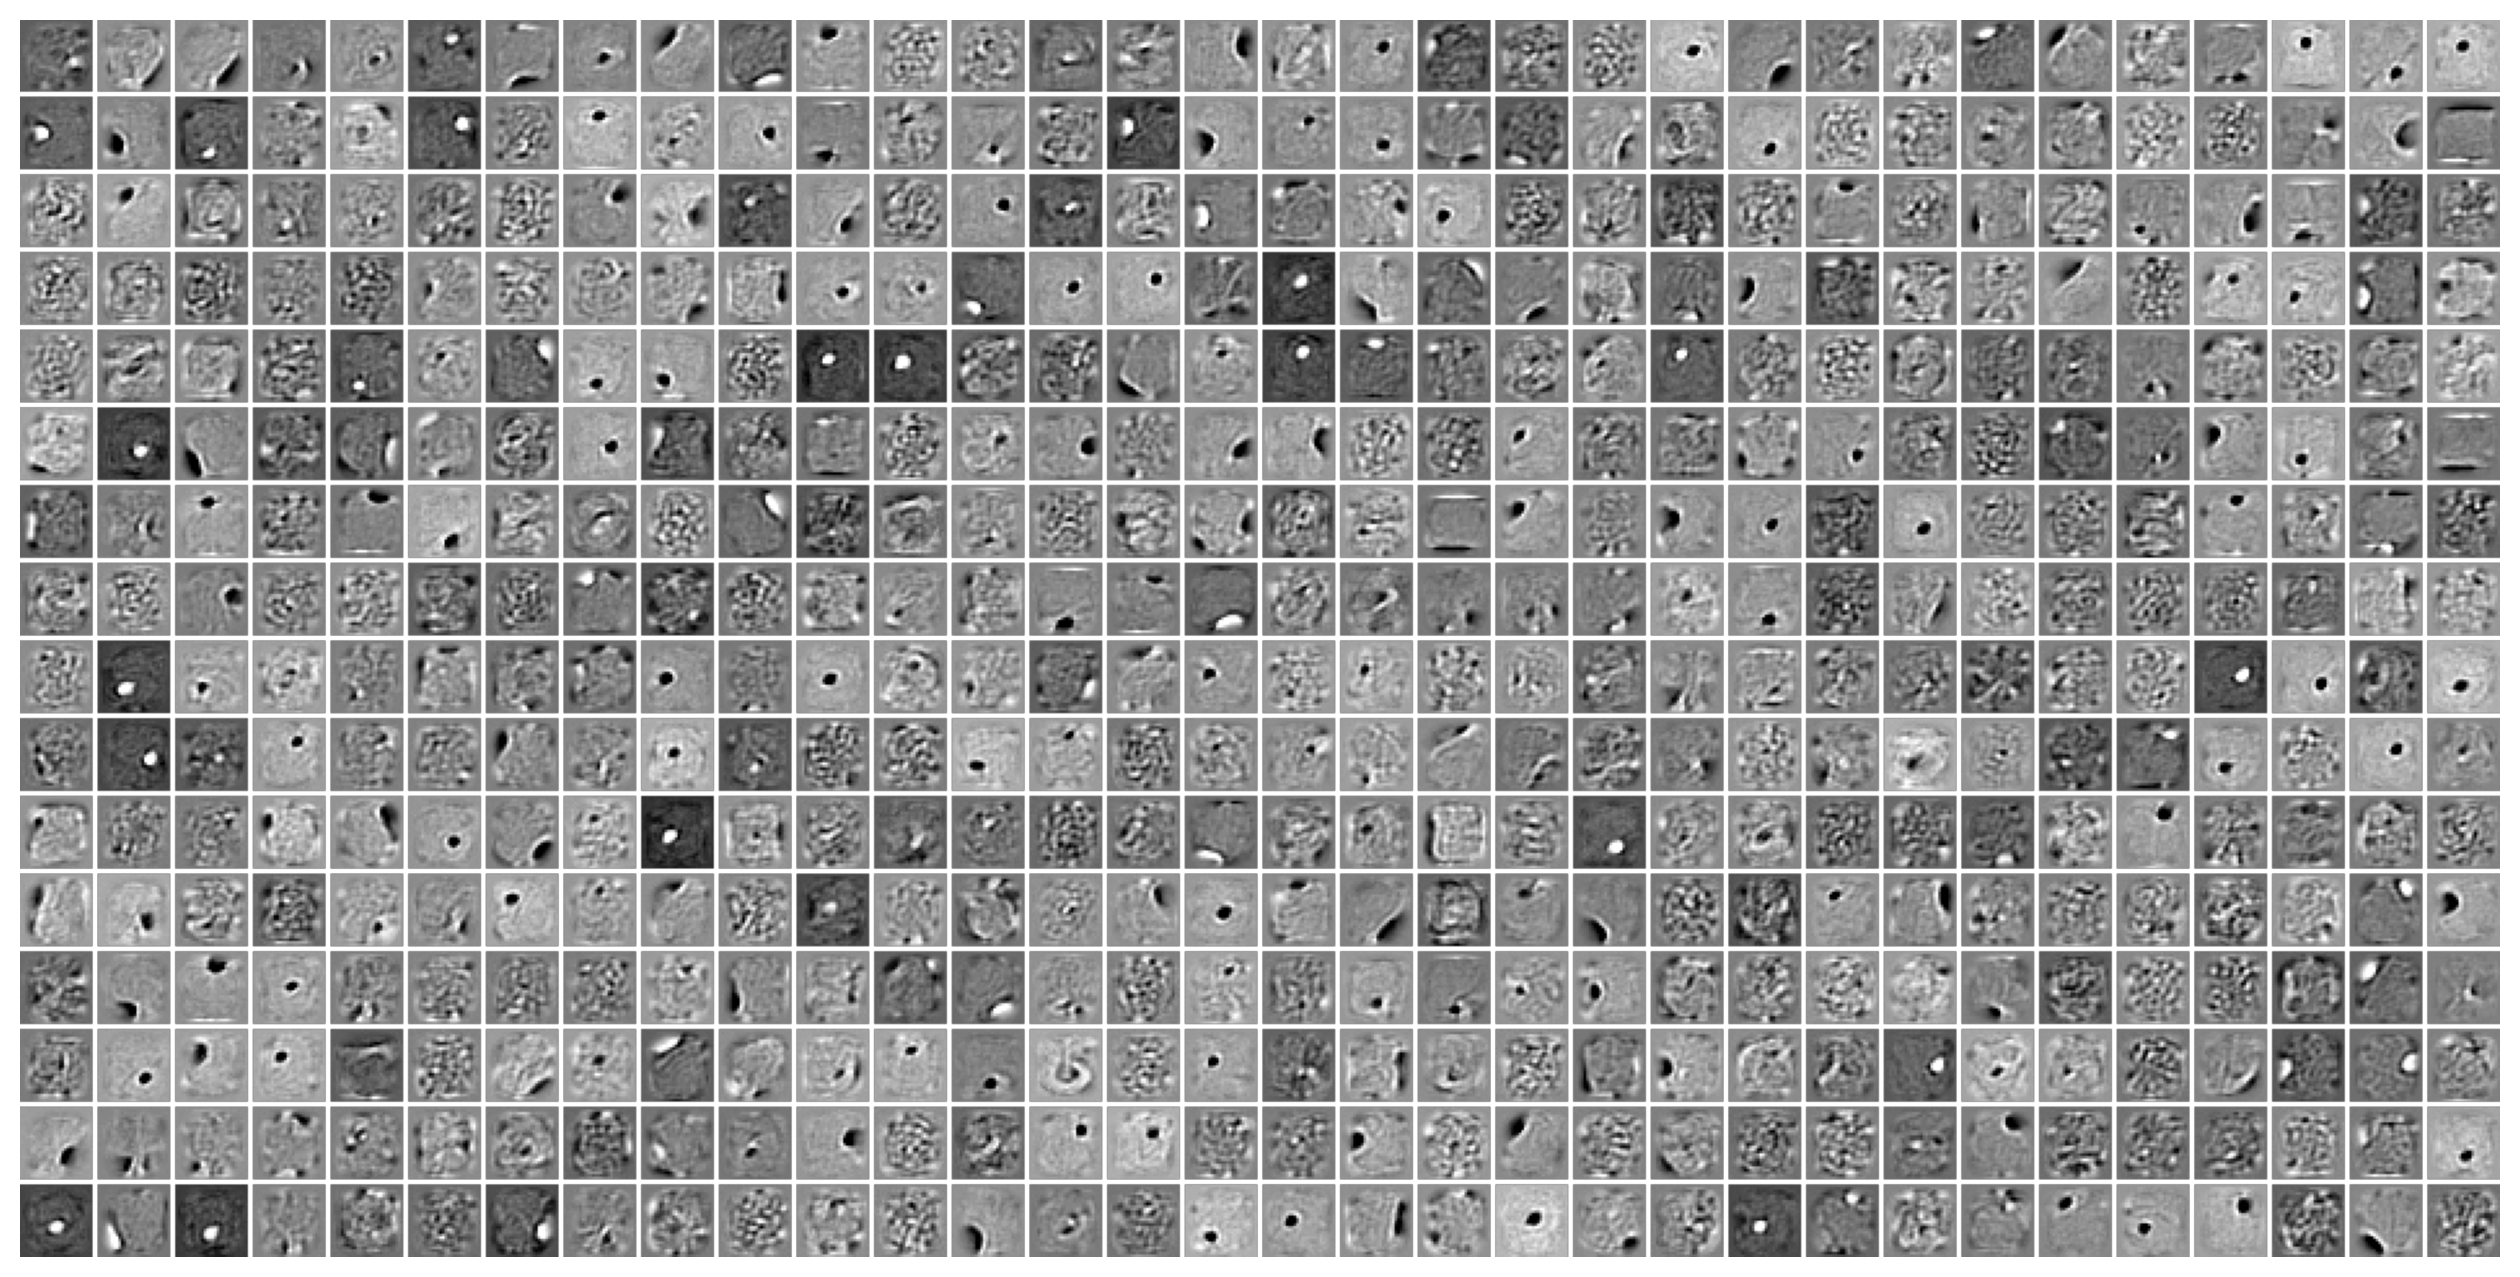

In [85]:
# Displaying RBM filetrs
filters = np.transpose(rbm.W)[:-1, :-1]
filters = filters.reshape(16, -1, 28, 28)
filters = np.clip(filters, -1.0, 1.0)

tiles(filters)